In [3]:
# This script contains data exploration and analysis steps for a period from
# 2022 to the first quarter of 2023.

## SEC Insider Transaction Datasets
  
Reference: insider_transactions_readme.htm

1. **Overview**
- The data is extracted from the EDGAR system and comes in .tsv file format.
- The data is from the documents (form 3, 4, and 5) that insiders (such as directors, senior executives, and large-block shareholders) must file with SEC.

2. **Scope**
- Data Quality: Errors and inconsistencies in the data "as-filed" might exist, thus cleaning the data or making assumptions might be required to analyze the dataset.
- Data Completeness: The data does not include all available information.
- Data Timeliness: The data is published quarterly
- Time Scope: From January 2006 till the current period

3. **Structure**
- Each file has specific primary keys (ACCESSION_NUMBER, RPTOWNERCIK, NONDERIV_TRANS_SK, etc.)
- The data includes both transaction data and holding data for both non-derivative and derivative securities.
    - Non-Derivative Securities: Standard types of securities such as stocks and bonds.
    - Derivative Securities: Securities whose value is derived from underlying assets such as options and futures contracts.

4. **Table Definitions**
- **SUBMISSION**:
    High level information about each SEC filing, context about the form type, date of submission, and the company involved in the submission. All other tables are related to this one via the `ACCESSION_NUMBER`.

- **REPORTINGOWNER**:
    Individuals or entities that is reporting the information to the SEC.
    
- **NONDERIV_TRANS, NONDERIV_HOLDING, DERIV_TRANS, DERIV_HOLDING**:
    The transactions and holdings.
    
    - **NONDERIV_TRANS and NONDERIV_HOLDING**:
        Transaction and holdings data for non-derivative securities for each reporting owner in a given submission.
        
    - **DERIV_TRANS and DERIV_HOLDING**:
        Similar to the above, but for derivative transactions.

6. **Trans Codes**:  
    **A**: Granting, awarding, or other acquisition of securities  
    **C**: Conversion of derivative security into another form of security  
    **D**: Disposition of securities back to the issuer (company).  
    **E**: Expiration of short derivative position (a derivative contract that had been sold without being owned (shorted)).  
    **F**: Payment of exercise price or tax liability by delivering or withholding securities incident to the receipt, exercise or vesting of a security issued in accordance with Rule 16b-3. This is when the insider pays the price to exercise an option or meet a tax obligation by using securities instead of cash.  
    **G**: Bona fide gift (securities as a gift).  
    **H**: Expiration or cancellation of long derivative position with received value.  
    **I**: Discretionary acquisition or disposition of issuer securities.  
    **J**: Other forms of acquisition or disposition not covered by other codes.  
    **L**: Small acquisition of securities.  
    **M**: Exercise or conversion of derivative security.  
    **O**: Exercise of an unprofitable derivative security.  
    **P**: Purchase of non-derivative or derivative security in open market or private transaction.  
    **S**: Sale of non-derivative or derivative security in open market or private transaction.  
    **U**: Disposition of shares as part of a change in who controls the company, such as a merger or acquisition.  
    **W**: Acquisition or disposition of securities through inheritance.  
    **X**: Exercise of profitable or break-even derivative security.  
    **Z**: Deposit into or withdrawal from a voting trust (a trust that has the power to vote on company matters).  

    Note: 
    - `P` and `S` are the most straightforward and common transactions. They indicate open market or private purchases and sales of securities. Seeing what insiders are buying or selling can give insights into their belief in the company's future performance.  
    - `M` refers to the exercise of a derivative security. This might be of interest as it shows that the insider believes it to be beneficial to exercise their options, which might indicate a belief in positive future performance.  
    - `D` might be seen as a negative signal, a desire to decrease one's position in the company.  
    - `A` happens frequently as part of compensation packages. The frequency and size of these grants could give you insights into how the company uses stock-based compensation.   
    - `G` does not necessarily signal anything about the company's performance, it can represent significant shifts in ownership.  

In [4]:
import pandas as pd

trans_df = pd.read_csv('Insider-Transactions-Data-Sets/2023q1_form345/NONDERIV_TRANS.tsv', sep='\t', low_memory=False)
sub_df = pd.read_csv('Insider-Transactions-Data-Sets/2023q1_form345/SUBMISSION.tsv', sep='\t', low_memory=False)

merged_df = pd.merge(trans_df, sub_df, on='ACCESSION_NUMBER')

merged_df.head()

,ACCESSION_NUMBER,NONDERIV_TRANS_SK,SECURITY_TITLE,SECURITY_TITLE_FN,TRANS_DATE,TRANS_DATE_FN,DEEMED_EXECUTION_DATE,DEEMED_EXECUTION_DATE_FN,TRANS_FORM_TYPE,TRANS_CODE,...,DATE_OF_ORIG_SUB,NO_SECURITIES_OWNED,NOT_SUBJECT_SEC16,FORM3_HOLDINGS_REPORTED,FORM4_TRANS_REPORTED,DOCUMENT_TYPE,ISSUERCIK,ISSUERNAME,ISSUERTRADINGSYMBOL,REMARKS
0,0001787306-23-000025,6348733,Common Stock,NaN,02-MAR-2023,NaN,NaN,NaN,4,A,...,28-FEB-2023,NaN,0,NaN,NaN,4/A,1787306,"Arcutis Biotherapeutics, Inc.",ARQT,Reporting Person's title: Chief Executive Offi...
1,0001104659-23-040415,6348570,Common Stock,NaN,29-MAR-2023,NaN,NaN,NaN,4,M,...,NaN,NaN,0,NaN,NaN,4,1649904,"RHYTHM PHARMACEUTICALS, INC.",RYTM,NaN
2,0001104659-23-040415,6348571,Common Stock,NaN,29-MAR-2023,NaN,NaN,NaN,4,S,...,NaN,NaN,0,NaN,NaN,4,1649904,"RHYTHM PHARMACEUTICALS, INC.",RYTM,NaN
3,0001140361-23-015527,6348879,"Ordinary Shares, par value $0.01 per share",NaN,29-MAR-2023,NaN,NaN,NaN,4,S,...,NaN,NaN,NaN,NaN,NaN,4,1559053,PROTHENA CORP PUBLIC LTD CO,PRTA,NaN
4,0001140361-23-015527,6348878,"Ordinary Shares, par value $0.01 per share",NaN,29-MAR-2023,NaN,NaN,NaN,4,S,...,NaN,NaN,NaN,NaN,NaN,4,1559053,PROTHENA CORP PUBLIC LTD CO,PRTA,NaN


In [5]:
import os
import pandas as pd

path = 'Insider-Transactions-Data-Sets/'

all_dirs = os.listdir(path)

all_dirs

['2017q3_form345',
 '2018q4_form345',
 '2022q3_form345',
 '2010q1_form345',
 '2008q2_form345',
 '2015q4_form345',
 '2011q2_form345',
 '2020q4_form345',
 '2009q1_form345',
 '2016q1_form345',
 '.DS_Store',
 '2011q3_form345',
 '2023q1_form345',
 '2017q2_form345',
 '2007q4_form345',
 '2022q2_form345',
 '2013q4_form345',
 '2008q3_form345',
 '2019q4_form345',
 '2016q3_form345',
 '2009q2_form345',
 '2011q1_form345',
 '2014q4_form345',
 '2021q4_form345',
 '2008q1_form345',
 '2010q2_form345',
 '2017q1_form345',
 '2010q3_form345',
 '2022q1_form345',
 '2016q2_form345',
 '2012q4_form345',
 '2009q3_form345',
 '2006q4_form345',
 '2020q3_form345',
 '2012q1_form345',
 '2006q1_form345',
 '2015q3_form345',
 '2013q2_form345',
 '2007q2_form345',
 '2022q4_form345',
 '2018q3_form345',
 '2017q4_form345',
 '2013q3_form345',
 '2021q1_form345',
 '2008q4_form345',
 '2007q3_form345',
 '2018q2_form345',
 '2014q1_form345',
 '2020q2_form345',
 '2011q4_form345',
 '2015q2_form345',
 '2019q1_form345',
 '2007q1_form345'

In [6]:
import os
import pandas as pd

def read_tsv(path, file_name):
    all_dirs = [name for name in os.listdir(path) if name.startswith('2')]

    dirs = [name for name in all_dirs]
    
    dfs = []

    for directory in dirs:
        tsv_path = os.path.join(path, directory, file_name)
        df = pd.read_csv(tsv_path, sep='\t', low_memory=False)
        dfs.append(df)

    df = pd.concat(dfs, ignore_index=True)

    return df


path = 'Insider-Transactions-Data-Sets/'

trans_df = read_tsv(path, 'NONDERIV_TRANS.tsv')

sub_df = read_tsv(path, 'SUBMISSION.tsv')

trans_df = pd.merge(trans_df, sub_df, on='ACCESSION_NUMBER')

trans_df.head()

,ACCESSION_NUMBER,NONDERIV_TRANS_SK,SECURITY_TITLE,SECURITY_TITLE_FN,TRANS_DATE,TRANS_DATE_FN,DEEMED_EXECUTION_DATE,DEEMED_EXECUTION_DATE_FN,TRANS_FORM_TYPE,TRANS_CODE,...,DATE_OF_ORIG_SUB,NO_SECURITIES_OWNED,NOT_SUBJECT_SEC16,FORM3_HOLDINGS_REPORTED,FORM4_TRANS_REPORTED,DOCUMENT_TYPE,ISSUERCIK,ISSUERNAME,ISSUERTRADINGSYMBOL,REMARKS
0,0000076605-17-000122,1444527,Common Stock,NaN,28-SEP-2017,NaN,NaN,NaN,4.0,S,...,NaN,NaN,0,NaN,NaN,4,76605,PATRICK INDUSTRIES INC,PATK,NaN
1,0000076605-17-000122,1444526,Common Stock,NaN,27-SEP-2017,NaN,NaN,NaN,4.0,S,...,NaN,NaN,0,NaN,NaN,4,76605,PATRICK INDUSTRIES INC,PATK,NaN
2,0000076605-17-000121,1334551,Common Stock,NaN,27-SEP-2017,NaN,NaN,NaN,4.0,S,...,NaN,NaN,0,NaN,NaN,4,76605,PATRICK INDUSTRIES INC,PATK,NaN
3,0001140361-17-037034,1161256,Common Stock,NaN,27-SEP-2017,NaN,NaN,NaN,4.0,F,...,NaN,NaN,0,NaN,NaN,4,1535379,"Cloudera, Inc.",CLDR,NaN
4,0001140361-17-037033,1158175,Common Stock,NaN,27-SEP-2017,NaN,NaN,NaN,4.0,F,...,NaN,NaN,0,NaN,NaN,4,1535379,"Cloudera, Inc.",CLDR,NaN


In [7]:
features = ['ACCESSION_NUMBER', 'NONDERIV_TRANS_SK', 'SECURITY_TITLE', 'TRANS_DATE', 'TRANS_CODE', 'TRANS_SHARES', 'SHRS_OWND_FOLWNG_TRANS', 'ISSUERCIK', 'ISSUERNAME', 'ISSUERTRADINGSYMBOL']
trans_df = trans_df[features]

trans_df

,ACCESSION_NUMBER,NONDERIV_TRANS_SK,SECURITY_TITLE,TRANS_DATE,TRANS_CODE,TRANS_SHARES,SHRS_OWND_FOLWNG_TRANS,ISSUERCIK,ISSUERNAME,ISSUERTRADINGSYMBOL
0,0000076605-17-000122,1444527,Common Stock,28-SEP-2017,S,2000.00,67193.00,76605,PATRICK INDUSTRIES INC,PATK
1,0000076605-17-000122,1444526,Common Stock,27-SEP-2017,S,5000.00,69193.00,76605,PATRICK INDUSTRIES INC,PATK
2,0000076605-17-000121,1334551,Common Stock,27-SEP-2017,S,10000.00,362227.00,76605,PATRICK INDUSTRIES INC,PATK
3,0001140361-17-037034,1161256,Common Stock,27-SEP-2017,F,44043.00,52665.00,1535379,"Cloudera, Inc.",CLDR
4,0001140361-17-037033,1158175,Common Stock,27-SEP-2017,F,12303.00,20552.00,1535379,"Cloudera, Inc.",CLDR
...,...,...,...,...,...,...,...,...,...,...
6347159,0001144204-18-000035,1063208,Common Stock,28-DEC-2017,A,8150.00,11174.00,1499961,"Net Element, Inc.",NETE
6347160,0000899243-18-000006,874376,Common Stock,29-DEC-2017,M,38800.00,141842.00,1388658,"iRhythm Technologies, Inc.",IRTC
6347161,0000899243-18-000005,955859,Class I common shares of beneficial interest,31-DEC-2017,S,399892.03,1249947.99,1589390,Evanston Alternative Opportunities Fund,NONE
6347162,0001062993-18-000002,945747,Common Stock,15-DEC-2017,P,250000.00,7571500.00,1648636,Park Place Energy Inc.,PKPL


In [12]:
print(trans_df['TRANS_DATE'].dtypes)
trans_df['TRANS_DATE'] = pd.to_datetime(trans_df['TRANS_DATE'], errors='coerce')

print(trans_df['TRANS_DATE'].dtypes)

trans_df.head()

print(trans_df['TRANS_DATE'])
print(trans_df['TRANS_DATE'].dtypes)
print(trans_df['TRANS_DATE'].min())

object
datetime64[ns]
0         2017-09-28
1         2017-09-27
2         2017-09-27
3         2017-09-27
4         2017-09-27
             ...    
6347159   2017-12-28
6347160   2017-12-29
6347161   2017-12-31
6347162   2017-12-15
6347163   2017-12-13
Name: TRANS_DATE, Length: 6347164, dtype: datetime64[ns]
datetime64[ns]
1982-03-01 00:00:00


In [13]:
duplicates = trans_df[trans_df.duplicated(keep=False)]

duplicates

,ACCESSION_NUMBER,NONDERIV_TRANS_SK,SECURITY_TITLE,TRANS_DATE,TRANS_CODE,TRANS_SHARES,SHRS_OWND_FOLWNG_TRANS,ISSUERCIK,ISSUERNAME,ISSUERTRADINGSYMBOL


In [14]:
trans_df.isnull().sum()

ACCESSION_NUMBER             0
NONDERIV_TRANS_SK            0
SECURITY_TITLE              15
TRANS_DATE                  38
TRANS_CODE                   1
TRANS_SHARES                 0
SHRS_OWND_FOLWNG_TRANS    2097
ISSUERCIK                    0
ISSUERNAME                1591
ISSUERTRADINGSYMBOL       7286
dtype: int64

In [15]:
missing_shares = trans_df[trans_df['SHRS_OWND_FOLWNG_TRANS'].isnull()]
missing_shares

,ACCESSION_NUMBER,NONDERIV_TRANS_SK,SECURITY_TITLE,TRANS_DATE,TRANS_CODE,TRANS_SHARES,SHRS_OWND_FOLWNG_TRANS,ISSUERCIK,ISSUERNAME,ISSUERTRADINGSYMBOL
525,0001282437-17-000010,1367286,Limited Partnership Interests,2017-09-29,D,1.0,NaN,1478268,"SALIENT PRIVATE ACCESS INSTITUTIONAL FUND, L.P.",None
528,0001282437-17-000009,1375466,Limited Partnership Interests,2017-09-29,D,1.0,NaN,1478268,"SALIENT PRIVATE ACCESS INSTITUTIONAL FUND, L.P.",None
530,0001282437-17-000008,1230531,Limited Partnership Interests,2017-09-29,D,1.0,NaN,1320688,"SALIENT PRIVATE ACCESS TEI FUND, L.P.",None
537,0001282437-17-000007,1384302,Limited Partnership Interests,2017-09-29,D,1.0,NaN,1279392,SALIENT PRIVATE ACCESS MASTER FUND L P,None
541,0001282437-17-000006,1271273,Limited Partnership Interests,2017-09-29,D,1.0,NaN,1279392,SALIENT PRIVATE ACCESS MASTER FUND L P,None
...,...,...,...,...,...,...,...,...,...,...
6334220,0001104659-18-002130,1050028,Common shares representing limited partner int...,2018-01-10,A,2117.0,NaN,1623925,Antero Midstream GP LP,AMGP
6346919,0001140361-18-000065,950487,Limited Liability Company Interests,2017-12-29,D,0.0,NaN,1169583,AETOS CAPITAL LONG/SHORT STRATEGIES FUND LLC,NONE
6346924,0001140361-18-000063,1014410,Limited Liability Company Interests,2017-12-29,D,0.0,NaN,1169580,AETOS CAPITAL MULTI-STRATEGY ARBITRAGE FUND LLC,NONE
6346931,0001140361-18-000060,1010360,Limited Liability Company Interests,2017-12-29,D,0.0,NaN,1169583,AETOS CAPITAL LONG/SHORT STRATEGIES FUND LLC,NONE


In [16]:
missing_name = trans_df[trans_df['ISSUERNAME'].isnull()]
missing_symbol = trans_df[trans_df['ISSUERTRADINGSYMBOL'].isnull()]

missing_symbol

,ACCESSION_NUMBER,NONDERIV_TRANS_SK,SECURITY_TITLE,TRANS_DATE,TRANS_CODE,TRANS_SHARES,SHRS_OWND_FOLWNG_TRANS,ISSUERCIK,ISSUERNAME,ISSUERTRADINGSYMBOL
884,0001387131-17-004856,1184379,CLASS A COMMON STOCK,2017-09-27,A,3075.00,13075.00,1615222,"Moody National REIT II, Inc.",NaN
888,0001387131-17-004854,1335885,CLASS A COMMON STOCK,2017-09-27,A,5000.00,5000.00,1615222,"Moody National REIT II, Inc.",NaN
893,0001387131-17-004852,1210708,CLASS A COMMON STOCK,2017-09-27,A,5000.00,13968.00,1615222,"Moody National REIT II, Inc.",NaN
894,0001387131-17-004852,1210707,CLASS A COMMON STOCK,2017-09-27,A,8968.00,8968.00,1615222,"Moody National REIT II, Inc.",NaN
925,0001387131-17-004846,1174267,CLASS A COMMON STOCK,2017-09-27,D,15000.00,0.00,1424879,"Moody National REIT I, Inc.",NaN
...,...,...,...,...,...,...,...,...,...,...
6345486,0001209191-18-000567,1113232,Common Stock,2017-12-29,A,231.48,440.86,1424182,"Broadstone Net Lease, Inc.",NaN
6345502,0001209191-18-000558,875831,Common Stock,2017-12-29,A,256.17,4581.23,1424182,"Broadstone Net Lease, Inc.",NaN
6345514,0001209191-18-000553,1111039,Common Stock,2017-12-29,P,185.19,2740.82,1424182,"Broadstone Net Lease, Inc.",NaN
6346142,0001624625-18-000002,1055222,Common Stock,2017-12-15,G,18750.00,172253.00,1541884,PROLUNG INC,NaN


In [17]:
missing_issuer = trans_df[trans_df['ISSUERNAME'].isnull() & trans_df['ISSUERTRADINGSYMBOL'].isnull()]
missing_issuer

,ACCESSION_NUMBER,NONDERIV_TRANS_SK,SECURITY_TITLE,TRANS_DATE,TRANS_CODE,TRANS_SHARES,SHRS_OWND_FOLWNG_TRANS,ISSUERCIK,ISSUERNAME,ISSUERTRADINGSYMBOL
149073,0000899243-22-029122,6159035,Class I Common Shares,2022-08-17,J,405401.0,139826.0,1711929,NaN,NaN


In [18]:
trans_df = trans_df.dropna(subset=['ISSUERNAME', 'ISSUERTRADINGSYMBOL'], how='all')

trans_df

,ACCESSION_NUMBER,NONDERIV_TRANS_SK,SECURITY_TITLE,TRANS_DATE,TRANS_CODE,TRANS_SHARES,SHRS_OWND_FOLWNG_TRANS,ISSUERCIK,ISSUERNAME,ISSUERTRADINGSYMBOL
0,0000076605-17-000122,1444527,Common Stock,2017-09-28,S,2000.00,67193.00,76605,PATRICK INDUSTRIES INC,PATK
1,0000076605-17-000122,1444526,Common Stock,2017-09-27,S,5000.00,69193.00,76605,PATRICK INDUSTRIES INC,PATK
2,0000076605-17-000121,1334551,Common Stock,2017-09-27,S,10000.00,362227.00,76605,PATRICK INDUSTRIES INC,PATK
3,0001140361-17-037034,1161256,Common Stock,2017-09-27,F,44043.00,52665.00,1535379,"Cloudera, Inc.",CLDR
4,0001140361-17-037033,1158175,Common Stock,2017-09-27,F,12303.00,20552.00,1535379,"Cloudera, Inc.",CLDR
...,...,...,...,...,...,...,...,...,...,...
6347159,0001144204-18-000035,1063208,Common Stock,2017-12-28,A,8150.00,11174.00,1499961,"Net Element, Inc.",NETE
6347160,0000899243-18-000006,874376,Common Stock,2017-12-29,M,38800.00,141842.00,1388658,"iRhythm Technologies, Inc.",IRTC
6347161,0000899243-18-000005,955859,Class I common shares of beneficial interest,2017-12-31,S,399892.03,1249947.99,1589390,Evanston Alternative Opportunities Fund,NONE
6347162,0001062993-18-000002,945747,Common Stock,2017-12-15,P,250000.00,7571500.00,1648636,Park Place Energy Inc.,PKPL


In [19]:
trans_df.columns

Index(['ACCESSION_NUMBER', 'NONDERIV_TRANS_SK', 'SECURITY_TITLE', 'TRANS_DATE',
       'TRANS_CODE', 'TRANS_SHARES', 'SHRS_OWND_FOLWNG_TRANS', 'ISSUERCIK',
       'ISSUERNAME', 'ISSUERTRADINGSYMBOL'],
      dtype='object')

In [20]:
"""
- The number of transactions over time (per week or per month)
- The distribution of transaction types over time
- The number of transactions per issuer
- The correlation between the number of shares transacted and the stock price
"""

'\n- The number of transactions over time (per week or per month)\n- The distribution of transaction types over time\n- The number of transactions per issuer\n- The correlation between the number of shares transacted and the stock price\n'

/var/folders/6n/xx_w7xj16q5gfbt_pm8vdmvh0000gn/T/ipykernel_27066/3910926026.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['YEAR_QUARTER'] = filtered_df['TRANS_DATE'].dt.to_period('Q')


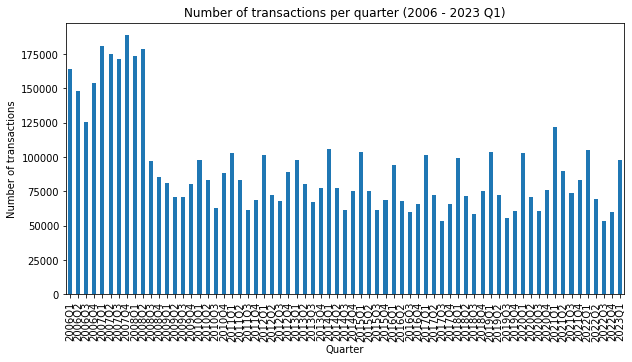

In [21]:
import matplotlib.pyplot as plt

start_date = pd.to_datetime('2006-01-01')
end_date = pd.to_datetime('2023-04-01')

filtered_df = trans_df[(trans_df['TRANS_DATE'] >= start_date) & (trans_df['TRANS_DATE'] < end_date)]

filtered_df['YEAR_QUARTER'] = filtered_df['TRANS_DATE'].dt.to_period('Q')
filtered_df['YEAR_QUARTER'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.title('Number of transactions per quarter (2006 - 2023 Q1)')
plt.xlabel('Quarter')
plt.ylabel('Number of transactions')
plt.show()

In [22]:
import pandas as pd

date_str = "01-JUL-2006"

date = pd.to_datetime(date_str, format="%d-%b-%Y")

print(date)
trans_df['TRANS_DATE'].dtypes


2006-07-01 00:00:00


dtype('<M8[ns]')

In [23]:
print("Earliest transaction date:", trans_df['TRANS_DATE'].min())
print("Latest transaction date:", trans_df['TRANS_DATE'].max())


Earliest transaction date: 1982-03-01 00:00:00
Latest transaction date: 2047-05-24 00:00:00


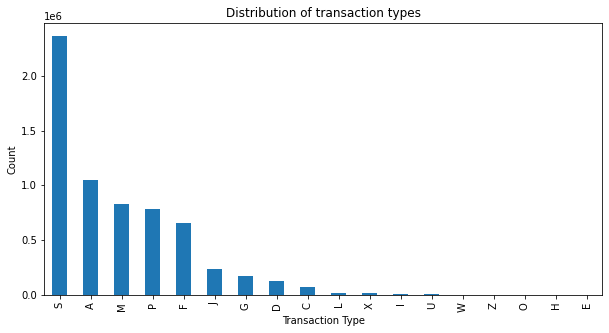

In [24]:
trans_df['TRANS_CODE'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Distribution of transaction types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

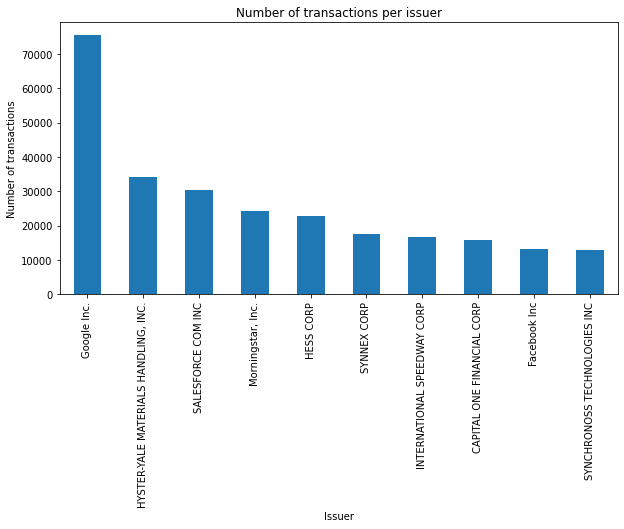

In [25]:
top_issuers = trans_df['ISSUERNAME'].value_counts().nlargest(10)
top_issuers.plot(kind='bar', figsize=(10,5))
plt.title('Number of transactions per issuer')
plt.xlabel('Issuer')
plt.ylabel('Number of transactions')
plt.show()


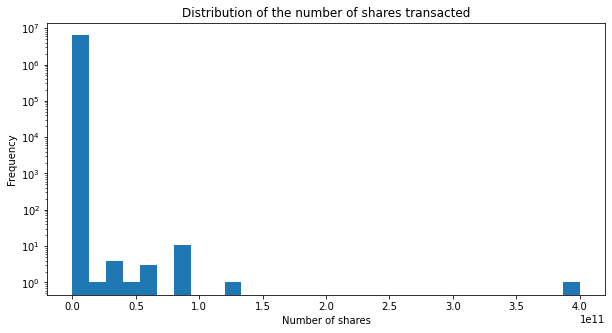

In [26]:
trans_df['TRANS_SHARES'].plot(kind='hist', bins=30, figsize=(10,5), logy=True)
plt.title('Distribution of the number of shares transacted')
plt.xlabel('Number of shares')
plt.ylabel('Frequency')
plt.show()

In [27]:
trans_df.columns

Index(['ACCESSION_NUMBER', 'NONDERIV_TRANS_SK', 'SECURITY_TITLE', 'TRANS_DATE',
       'TRANS_CODE', 'TRANS_SHARES', 'SHRS_OWND_FOLWNG_TRANS', 'ISSUERCIK',
       'ISSUERNAME', 'ISSUERTRADINGSYMBOL'],
      dtype='object')

In [28]:
trans_df = trans_df[['ACCESSION_NUMBER', 'NONDERIV_TRANS_SK', 'TRANS_DATE', 'TRANS_CODE', 'TRANS_SHARES', 'SHRS_OWND_FOLWNG_TRANS', 'ISSUERCIK', 'ISSUERNAME', 'ISSUERTRADINGSYMBOL']]
trans_df['TRANS_CODE'].value_counts()

trans_types = ['S', 'A', 'F', 'M', 'P', 'J', 'G', 'C', 'D']
trans_df = trans_df[trans_df['TRANS_CODE'].isin(trans_types)]

trans_df

,ACCESSION_NUMBER,NONDERIV_TRANS_SK,TRANS_DATE,TRANS_CODE,TRANS_SHARES,SHRS_OWND_FOLWNG_TRANS,ISSUERCIK,ISSUERNAME,ISSUERTRADINGSYMBOL
0,0000076605-17-000122,1444527,2017-09-28,S,2000.00,67193.00,76605,PATRICK INDUSTRIES INC,PATK
1,0000076605-17-000122,1444526,2017-09-27,S,5000.00,69193.00,76605,PATRICK INDUSTRIES INC,PATK
2,0000076605-17-000121,1334551,2017-09-27,S,10000.00,362227.00,76605,PATRICK INDUSTRIES INC,PATK
3,0001140361-17-037034,1161256,2017-09-27,F,44043.00,52665.00,1535379,"Cloudera, Inc.",CLDR
4,0001140361-17-037033,1158175,2017-09-27,F,12303.00,20552.00,1535379,"Cloudera, Inc.",CLDR
...,...,...,...,...,...,...,...,...,...
6347159,0001144204-18-000035,1063208,2017-12-28,A,8150.00,11174.00,1499961,"Net Element, Inc.",NETE
6347160,0000899243-18-000006,874376,2017-12-29,M,38800.00,141842.00,1388658,"iRhythm Technologies, Inc.",IRTC
6347161,0000899243-18-000005,955859,2017-12-31,S,399892.03,1249947.99,1589390,Evanston Alternative Opportunities Fund,NONE
6347162,0001062993-18-000002,945747,2017-12-15,P,250000.00,7571500.00,1648636,Park Place Energy Inc.,PKPL


In [29]:
trans_df.isnull().sum()

ACCESSION_NUMBER             0
NONDERIV_TRANS_SK            0
TRANS_DATE                  37
TRANS_CODE                   0
TRANS_SHARES                 0
SHRS_OWND_FOLWNG_TRANS    2057
ISSUERCIK                    0
ISSUERNAME                1580
ISSUERTRADINGSYMBOL       7082
dtype: int64

In [30]:
trans_df_encoded = pd.get_dummies(trans_df, columns=['TRANS_CODE'])

In [31]:
trans_df_encoded

,ACCESSION_NUMBER,NONDERIV_TRANS_SK,TRANS_DATE,TRANS_SHARES,SHRS_OWND_FOLWNG_TRANS,ISSUERCIK,ISSUERNAME,ISSUERTRADINGSYMBOL,TRANS_CODE_A,TRANS_CODE_C,TRANS_CODE_D,TRANS_CODE_F,TRANS_CODE_G,TRANS_CODE_J,TRANS_CODE_M,TRANS_CODE_P,TRANS_CODE_S
0,0000076605-17-000122,1444527,2017-09-28,2000.00,67193.00,76605,PATRICK INDUSTRIES INC,PATK,0,0,0,0,0,0,0,0,1
1,0000076605-17-000122,1444526,2017-09-27,5000.00,69193.00,76605,PATRICK INDUSTRIES INC,PATK,0,0,0,0,0,0,0,0,1
2,0000076605-17-000121,1334551,2017-09-27,10000.00,362227.00,76605,PATRICK INDUSTRIES INC,PATK,0,0,0,0,0,0,0,0,1
3,0001140361-17-037034,1161256,2017-09-27,44043.00,52665.00,1535379,"Cloudera, Inc.",CLDR,0,0,0,1,0,0,0,0,0
4,0001140361-17-037033,1158175,2017-09-27,12303.00,20552.00,1535379,"Cloudera, Inc.",CLDR,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6347159,0001144204-18-000035,1063208,2017-12-28,8150.00,11174.00,1499961,"Net Element, Inc.",NETE,1,0,0,0,0,0,0,0,0
6347160,0000899243-18-000006,874376,2017-12-29,38800.00,141842.00,1388658,"iRhythm Technologies, Inc.",IRTC,0,0,0,0,0,0,1,0,0
6347161,0000899243-18-000005,955859,2017-12-31,399892.03,1249947.99,1589390,Evanston Alternative Opportunities Fund,NONE,0,0,0,0,0,0,0,0,1
6347162,0001062993-18-000002,945747,2017-12-15,250000.00,7571500.00,1648636,Park Place Energy Inc.,PKPL,0,0,0,0,0,0,0,1,0


In [32]:
unique_symbols = trans_df['ISSUERTRADINGSYMBOL'].unique()
print(unique_symbols)

['PATK' 'CLDR' 'INTX' ... 'CHWE' 'dc18*pol' 'TGLO']


In [33]:
import yfinance as yf

appl = yf.download('AAPL', start='2022-01-01', end='2023-12-31')
appl

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.434311,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,178.144287,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.405685,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.510956,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.679489,86709100
...,...,...,...,...,...,...
2023-07-25,193.330002,194.440002,192.919998,193.619995,193.619995,37283200
2023-07-26,193.669998,195.639999,193.320007,194.500000,194.500000,47471900
2023-07-27,196.020004,197.199997,192.550003,193.220001,193.220001,47460200


In [34]:
fb = yf.download('META', start='2021-01-01', end='2023-03-31')

fb

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,274.779999,275.000000,265.200012,268.940002,268.940002,15106100
2021-01-05,268.290009,272.399994,268.209991,270.970001,270.970001,9871600
2021-01-06,262.000000,267.750000,260.010010,263.309998,263.309998,24354100
2021-01-07,265.899994,271.609985,264.779999,268.739990,268.739990,15789800
2021-01-08,268.309998,268.950012,263.179993,267.570007,267.570007,18528300
...,...,...,...,...,...,...
2023-03-24,205.179993,207.580002,203.550003,206.009995,206.009995,27716400
2023-03-27,204.809998,205.860001,201.360001,202.839996,202.839996,18527200
2023-03-28,200.149994,201.029999,197.899994,200.679993,200.679993,19127300


In [35]:
fb_transactions = trans_df_encoded[trans_df_encoded['ISSUERTRADINGSYMBOL'].isin(['META', 'FB'])]

fb_transactions = fb_transactions.sort_values('TRANS_DATE')

# Reset the index after sorting
# fb_transactions = fb_transactions.reset_index(drop=True)

fb_transactions

,ACCESSION_NUMBER,NONDERIV_TRANS_SK,TRANS_DATE,TRANS_SHARES,SHRS_OWND_FOLWNG_TRANS,ISSUERCIK,ISSUERNAME,ISSUERTRADINGSYMBOL,TRANS_CODE_A,TRANS_CODE_C,TRANS_CODE_D,TRANS_CODE_F,TRANS_CODE_G,TRANS_CODE_J,TRANS_CODE_M,TRANS_CODE_P,TRANS_CODE_S
3239529,0001635987-15-000076,1896350,1999-06-30,0.0,NaN,1326801,Facebook Inc,FB,0,0,0,0,0,0,1,0,0
5005116,0001209191-13-006688,2387392,2011-02-01,7500.0,54062.0,1326801,Facebook Inc,FB,0,1,0,0,0,0,0,0,0
5280864,0000769993-12-000343,2712568,2012-05-17,5243185.0,8971622.0,1326801,Facebook Inc,FB,0,0,0,0,0,0,0,0,1
5280862,0000769993-12-000344,2749220,2012-05-17,19081701.0,32650733.0,1326801,Facebook Inc,FB,0,0,0,0,0,0,0,0,1
5276901,0001209191-12-029804,2841059,2012-05-22,15931653.0,15931653.0,1326801,Facebook Inc,FB,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966325,0000950103-23-003616,6313286,2023-02-28,393.0,31725.0,1326801,"Meta Platforms, Inc.",META,0,0,0,0,0,0,0,0,1
952521,0000950103-23-003915,6328744,2023-03-07,393.0,31332.0,1326801,"Meta Platforms, Inc.",META,0,0,0,0,0,0,0,0,1
943555,0000950103-23-004239,6337661,2023-03-14,393.0,30939.0,1326801,"Meta Platforms, Inc.",META,0,0,0,0,0,0,0,0,1
937227,0000950103-23-004548,6343155,2023-03-21,393.0,30546.0,1326801,"Meta Platforms, Inc.",META,0,0,0,0,0,0,0,0,1


In [36]:
dates = pd.date_range('2021-01-01', '2023-03-30')

date_df = pd.DataFrame(index=dates)

fb_transactions.set_index('TRANS_DATE', inplace=True)
fb_transactions = fb_transactions.groupby(fb_transactions.index).sum()

fb_transactions = fb_transactions.fillna(0)

fb_transactions

,NONDERIV_TRANS_SK,TRANS_SHARES,SHRS_OWND_FOLWNG_TRANS,ISSUERCIK,TRANS_CODE_A,TRANS_CODE_C,TRANS_CODE_D,TRANS_CODE_F,TRANS_CODE_G,TRANS_CODE_J,TRANS_CODE_M,TRANS_CODE_P,TRANS_CODE_S
TRANS_DATE,,,,,,,,,,,,,
1999-06-30,1896350,0.000000e+00,0.000000e+00,1326801,0,0,0,0,0,0,1,0,0
2011-02-01,2387392,7.500000e+03,5.406200e+04,1326801,0,1,0,0,0,0,0,0,0
2012-05-17,5461788,2.432489e+07,4.162236e+07,2653602,0,0,0,0,0,0,0,0,2
2012-05-22,192875044,1.026317e+09,1.211516e+09,91549269,0,34,0,0,0,0,0,0,35
2012-08-08,19350744,9.345730e+06,9.345730e+06,7960806,0,5,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-28,6313286,3.930000e+02,3.172500e+04,1326801,0,0,0,0,0,0,0,0,1
2023-03-07,6328744,3.930000e+02,3.133200e+04,1326801,0,0,0,0,0,0,0,0,1
2023-03-14,6337661,3.930000e+02,3.093900e+04,1326801,0,0,0,0,0,0,0,0,1


In [37]:
fb_trans_date = pd.merge(date_df, fb_transactions, how='left', left_index=True, right_index=True)

fb_trans_date = fb_trans_date.fillna(0)

fb_trans_date

,NONDERIV_TRANS_SK,TRANS_SHARES,SHRS_OWND_FOLWNG_TRANS,ISSUERCIK,TRANS_CODE_A,TRANS_CODE_C,TRANS_CODE_D,TRANS_CODE_F,TRANS_CODE_G,TRANS_CODE_J,TRANS_CODE_M,TRANS_CODE_P,TRANS_CODE_S
2021-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-04,6861135.0,78500.0,31499796.0,39804030.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0
2021-01-05,596730.0,78810.0,14001761.0,19902015.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-03-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-03-28,6348117.0,393.0,30153.0,1326801.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2023-03-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
fb.index = pd.to_datetime(fb.index)
fb_date = pd.merge(date_df, fb, how='left', left_index=True, right_index=True)

fb_date

,Open,High,Low,Close,Adj Close,Volume
2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-04,274.779999,275.000000,265.200012,268.940002,268.940002,15106100.0
2021-01-05,268.290009,272.399994,268.209991,270.970001,270.970001,9871600.0
...,...,...,...,...,...,...
2023-03-26,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-27,204.809998,205.860001,201.360001,202.839996,202.839996,18527200.0
2023-03-28,200.149994,201.029999,197.899994,200.679993,200.679993,19127300.0
2023-03-29,203.559998,205.720001,202.539993,205.350006,205.350006,18851100.0


In [39]:
fb_date.fillna(method='ffill', inplace=True)
fb_date.fillna(method='bfill', inplace=True)

fb_date

,Open,High,Low,Close,Adj Close,Volume
2021-01-01,274.779999,275.000000,265.200012,268.940002,268.940002,15106100.0
2021-01-02,274.779999,275.000000,265.200012,268.940002,268.940002,15106100.0
2021-01-03,274.779999,275.000000,265.200012,268.940002,268.940002,15106100.0
2021-01-04,274.779999,275.000000,265.200012,268.940002,268.940002,15106100.0
2021-01-05,268.290009,272.399994,268.209991,270.970001,270.970001,9871600.0
...,...,...,...,...,...,...
2023-03-26,205.179993,207.580002,203.550003,206.009995,206.009995,27716400.0
2023-03-27,204.809998,205.860001,201.360001,202.839996,202.839996,18527200.0
2023-03-28,200.149994,201.029999,197.899994,200.679993,200.679993,19127300.0
2023-03-29,203.559998,205.720001,202.539993,205.350006,205.350006,18851100.0


In [40]:
fb_data = pd.merge(fb_trans_date, fb_date, how='left', left_index=True, right_index=True)

fb_data

,NONDERIV_TRANS_SK,TRANS_SHARES,SHRS_OWND_FOLWNG_TRANS,ISSUERCIK,TRANS_CODE_A,TRANS_CODE_C,TRANS_CODE_D,TRANS_CODE_F,TRANS_CODE_G,TRANS_CODE_J,TRANS_CODE_M,TRANS_CODE_P,TRANS_CODE_S,Open,High,Low,Close,Adj Close,Volume
2021-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,274.779999,275.000000,265.200012,268.940002,268.940002,15106100.0
2021-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,274.779999,275.000000,265.200012,268.940002,268.940002,15106100.0
2021-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,274.779999,275.000000,265.200012,268.940002,268.940002,15106100.0
2021-01-04,6861135.0,78500.0,31499796.0,39804030.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,274.779999,275.000000,265.200012,268.940002,268.940002,15106100.0
2021-01-05,596730.0,78810.0,14001761.0,19902015.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,268.290009,272.399994,268.209991,270.970001,270.970001,9871600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.179993,207.580002,203.550003,206.009995,206.009995,27716400.0
2023-03-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,204.809998,205.860001,201.360001,202.839996,202.839996,18527200.0
2023-03-28,6348117.0,393.0,30153.0,1326801.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,200.149994,201.029999,197.899994,200.679993,200.679993,19127300.0
2023-03-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.559998,205.720001,202.539993,205.350006,205.350006,18851100.0


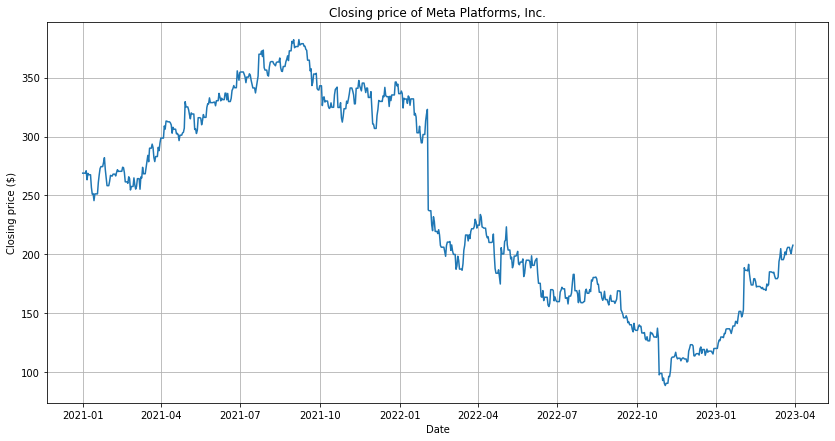

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
plt.plot(fb_data['Close'])
plt.title('Closing price of Meta Platforms, Inc.')
plt.xlabel('Date')
plt.ylabel('Closing price ($)')
plt.grid(True)
plt.show()

In [42]:
from sklearn.model_selection import train_test_split

features = fb_data[['NONDERIV_TRANS_SK', 'TRANS_SHARES', 'SHRS_OWND_FOLWNG_TRANS', 'ISSUERCIK', 
                    'TRANS_CODE_A', 'TRANS_CODE_C', 'TRANS_CODE_D', 'TRANS_CODE_F', 
                    'TRANS_CODE_G', 'TRANS_CODE_J', 'TRANS_CODE_M', 'TRANS_CODE_P', 'TRANS_CODE_S',
                    'Open', 'High', 'Low', 'Volume']]

target = fb_data['Close']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [44]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print('The mean squared error:', mse)

The mean squared error: 4.513005563779294


In [45]:
y_pred

array([282.71877978, 196.82075989, 182.13676822, 204.34045094,
       108.86630148, 163.47140717, 162.98761651, 190.74732258,
       352.40998183, 157.65240856, 265.09162244, 337.54552832,
        96.37732448, 358.73329814, 179.90025193, 198.06699575,
       339.63863184, 163.03799491, 166.62431102, 140.03857341,
       260.07906858, 192.62355056, 323.92383497, 317.78910296,
       358.33647169, 168.63261184, 168.01915874, 257.42864294,
       311.59669402, 271.10271582, 329.78893754, 127.68635842,
       213.59720565, 256.19900719, 127.68682531, 156.14955296,
       343.63987298, 277.0252727 , 149.85075011, 298.2911697 ,
       120.04982471, 182.13676822, 358.33647169, 110.05767838,
       161.30194322, 289.90410621, 327.58969598, 376.068803  ,
       158.81032704, 358.48084412, 197.7094025 , 157.40545983,
       131.99540702, 170.49400719, 157.40545983, 113.00233849,
       208.99680529, 138.30232694, 117.5301682 , 197.10482811,
       363.99352431, 169.64038781, 259.70409216, 317.09

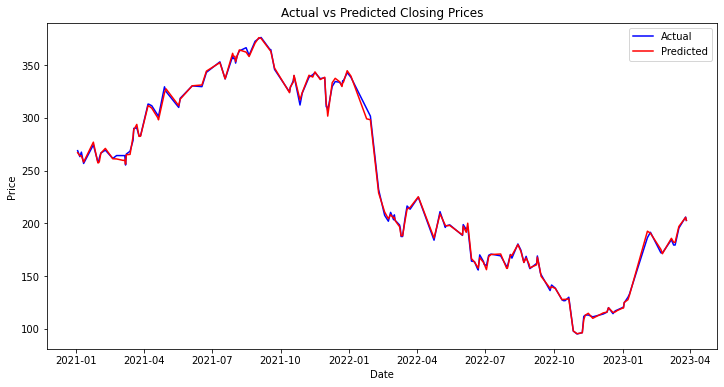

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

df_pred = pd.DataFrame(y_pred, index=y_test.index, columns=['Predicted'])

y_test_sorted = y_test.sort_index()
df_pred_sorted = df_pred.sort_index()

plt.figure(figsize=(12, 6))

plt.plot(y_test_sorted.index, y_test_sorted.values, label='Actual', color='b')

plt.plot(df_pred_sorted.index, df_pred_sorted.values, label='Predicted', color='r')

plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')

plt.legend()

plt.show()

In [47]:
residuals = y_test - y_pred

print('Residuals mean:', residuals.mean())
print('Residuals standard deviation:', residuals.std())

Residuals mean: 0.14490358201599787
Residuals standard deviation: 2.125927291830641


In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

MAE: 1.6330857374038632
MSE: 4.513005563779294
RMSE: 2.12438357265803


In [49]:
fb_data.drop(['NONDERIV_TRANS_SK', 'ISSUERCIK'], axis=1, inplace=True)